<a href="https://colab.research.google.com/github/ArkS0001/Data-Engineering/blob/main/ETL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import sqlite3
import time
import random
from datetime import datetime

# Create an in-memory SQLite database
def initialize_database():
    connection = sqlite3.connect(":memory:")
    cursor = connection.cursor()
    cursor.execute("""
        CREATE TABLE transactions (
            id INTEGER PRIMARY KEY,
            amount REAL,
            status TEXT,
            timestamp TEXT
        )
    """)
    connection.commit()
    return connection

# Simulated data extraction
def extract_data():
    return {
        "id": random.randint(1000, 9999),
        "amount": round(random.uniform(10, 500), 2),
        "status": random.choice(["SUCCESS", "FAILED", "PENDING"])
    }

# Data transformation: Add a timestamp and filter successful transactions
def transform_data(data):
    data["timestamp"] = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    return data if data["status"] == "SUCCESS" else None

# Load data into the SQLite database
def load_data(connection, data):
    cursor = connection.cursor()
    cursor.execute("""
        INSERT INTO transactions (id, amount, status, timestamp)
        VALUES (?, ?, ?, ?)
    """, (data["id"], data["amount"], data["status"], data["timestamp"]))
    connection.commit()

# Real-time ETL pipeline demonstration
def etl_pipeline(connection, iterations=10, delay=1):
    print("Starting ETL pipeline...")
    for _ in range(iterations):
        # Step 1: Extract
        raw_data = extract_data()
        print(f"Extracted: {raw_data}")

        # Step 2: Transform
        transformed_data = transform_data(raw_data)
        if transformed_data:
            print(f"Transformed: {transformed_data}")

            # Step 3: Load
            load_data(connection, transformed_data)
            print("Data loaded successfully.")
        else:
            print("Data filtered out (not SUCCESS).")

        time.sleep(delay)

    print("ETL pipeline completed.")

# Query the database for demonstration
def query_data(connection):
    cursor = connection.cursor()
    cursor.execute("SELECT * FROM transactions")
    rows = cursor.fetchall()
    print("\nStored Transactions:")
    for row in rows:
        print(row)

# Run the demonstration
if __name__ == "__main__":
    conn = initialize_database()
    etl_pipeline(conn, iterations=5, delay=2)
    query_data(conn)
    conn.close()



Starting ETL pipeline...
Extracted: {'id': 3194, 'amount': 434.87, 'status': 'PENDING'}
Data filtered out (not SUCCESS).
Extracted: {'id': 3852, 'amount': 428.65, 'status': 'PENDING'}
Data filtered out (not SUCCESS).
Extracted: {'id': 1841, 'amount': 121.34, 'status': 'PENDING'}
Data filtered out (not SUCCESS).
Extracted: {'id': 3049, 'amount': 191.12, 'status': 'SUCCESS'}
Transformed: {'id': 3049, 'amount': 191.12, 'status': 'SUCCESS', 'timestamp': '2024-12-08 11:00:49'}
Data loaded successfully.
Extracted: {'id': 7836, 'amount': 209.93, 'status': 'FAILED'}
Data filtered out (not SUCCESS).
ETL pipeline completed.

Stored Transactions:
(3049, 191.12, 'SUCCESS', '2024-12-08 11:00:49')


Starting ETL pipeline with visualization...
Extracted: {'id': 6347, 'amount': 201.14, 'status': 'FAILED'}
Data filtered out (not SUCCESS).
Extracted: {'id': 7175, 'amount': 404.64, 'status': 'PENDING'}
Data filtered out (not SUCCESS).
Extracted: {'id': 6569, 'amount': 163.34, 'status': 'PENDING'}
Data filtered out (not SUCCESS).
Extracted: {'id': 1216, 'amount': 135.02, 'status': 'PENDING'}
Data filtered out (not SUCCESS).
Extracted: {'id': 3259, 'amount': 450.22, 'status': 'SUCCESS'}
Transformed: {'id': 3259, 'amount': 450.22, 'status': 'SUCCESS', 'timestamp': '2024-12-08 11:03:41'}
Data loaded successfully.
Extracted: {'id': 1347, 'amount': 240.53, 'status': 'PENDING'}
Data filtered out (not SUCCESS).
Extracted: {'id': 7215, 'amount': 57.99, 'status': 'SUCCESS'}
Transformed: {'id': 7215, 'amount': 57.99, 'status': 'SUCCESS', 'timestamp': '2024-12-08 11:03:45'}
Data loaded successfully.
Extracted: {'id': 4734, 'amount': 222.58, 'status': 'FAILED'}
Data filtered out (not SUCCESS).
Extr

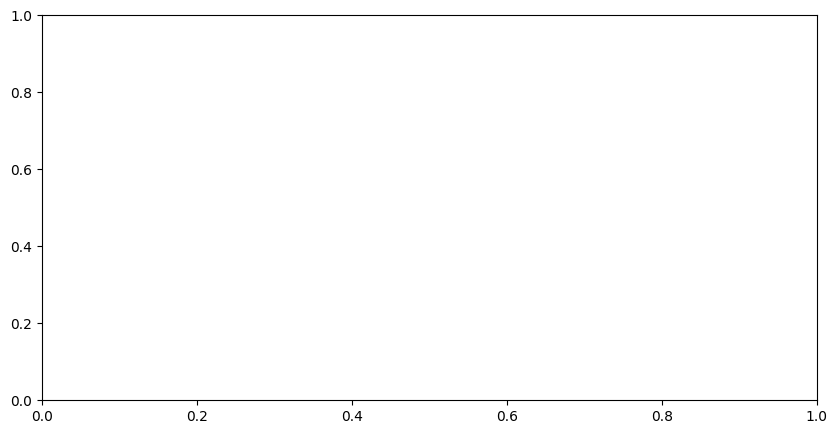

In [5]:
import sqlite3
import time
import random
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Create an in-memory SQLite database
def initialize_database():
    connection = sqlite3.connect(":memory:")
    cursor = connection.cursor()
    cursor.execute("""
        CREATE TABLE transactions (
            id INTEGER PRIMARY KEY,
            amount REAL,
            status TEXT,
            timestamp TEXT
        )
    """)
    connection.commit()
    return connection

# Simulated data extraction
def extract_data():
    return {
        "id": random.randint(1000, 9999),
        "amount": round(random.uniform(10, 500), 2),
        "status": random.choice(["SUCCESS", "FAILED", "PENDING"])
    }

# Data transformation: Add a timestamp and filter successful transactions
def transform_data(data):
    data["timestamp"] = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    return data if data["status"] == "SUCCESS" else None

# Load data into the SQLite database
def load_data(connection, data):
    cursor = connection.cursor()
    cursor.execute("""
        INSERT INTO transactions (id, amount, status, timestamp)
        VALUES (?, ?, ?, ?)
    """, (data["id"], data["amount"], data["status"], data["timestamp"]))
    connection.commit()

# Query data from the database
def query_latest_data(connection):
    cursor = connection.cursor()
    cursor.execute("SELECT amount, timestamp FROM transactions ORDER BY timestamp ASC LIMIT 10")
    return cursor.fetchall()

# Visualization setup
def update_visualization(frame, connection, x_data, y_data, ax):
    data = query_latest_data(connection)
    if data:
        x_data.clear()
        y_data.clear()
        for amount, timestamp in data:
            x_data.append(timestamp)
            y_data.append(amount)
        ax.clear()
        ax.plot(x_data, y_data, marker="o", color="blue", label="Transaction Amount")
        ax.set_title("Real-Time Transaction Amounts")
        ax.set_xlabel("Timestamp")
        ax.set_ylabel("Amount")
        ax.legend()
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()

# Real-time ETL pipeline demonstration
def etl_pipeline_with_visualization(connection, iterations=10, delay=1):
    print("Starting ETL pipeline with visualization...")

    x_data, y_data = [], []
    fig, ax = plt.subplots(figsize=(10, 5))

    ani = FuncAnimation(fig, update_visualization, fargs=(connection, x_data, y_data, ax), interval=delay * 1000, cache_frame_data=False)


    for i in range(iterations):
        # Step 1: Extract
        raw_data = extract_data()
        print(f"Extracted: {raw_data}")

        # Step 2: Transform
        transformed_data = transform_data(raw_data)
        if transformed_data:
            print(f"Transformed: {transformed_data}")

            # Step 3: Load
            load_data(connection, transformed_data)
            print("Data loaded successfully.")
        else:
            print("Data filtered out (not SUCCESS).")

        time.sleep(delay)

    print("ETL pipeline completed.")
    plt.show()

# Run the demonstration
if __name__ == "__main__":
    conn = initialize_database()
    etl_pipeline_with_visualization(conn, iterations=10, delay=2)  # Run for 10 iterations with 2-second intervals
    conn.close()


In [7]:
import sqlite3
import time
import random
from datetime import datetime

# Initialize SQLite database
def initialize_database():
    connection = sqlite3.connect(":memory:")
    cursor = connection.cursor()
    cursor.execute("""
        CREATE TABLE transactions (
            id INTEGER PRIMARY KEY,
            amount REAL,
            status TEXT,
            region TEXT,
            category TEXT,
            timestamp TEXT
        )
    """)
    connection.commit()
    return connection

# Simulate data extraction
def extract_data(batch_size=5):
    return [
        {
            "id": random.randint(1000, 9999),
            "amount": round(random.uniform(10, 500), 2),
            "status": random.choice(["SUCCESS", "FAILED", "PENDING"]),
            "region": random.choice(["North", "South", "East", "West"])
        }
        for _ in range(batch_size)
    ]

# Data transformation
def transform_data(batch):
    transformed_batch = []
    for record in batch:
        # Data quality check: Filter invalid data
        if record["amount"] <= 0 or not record["status"]:
            print(f"Invalid record discarded: {record}")
            continue

        # Normalize amount (scale between 0 and 1)
        record["normalized_amount"] = round(record["amount"] / 500, 2)

        # Categorize transactions
        if record["amount"] < 100:
            record["category"] = "Low"
        elif record["amount"] < 300:
            record["category"] = "Medium"
        else:
            record["category"] = "High"

        # Add timestamp
        record["timestamp"] = datetime.now().strftime("%Y-%m-%d %H:%M:%S")

        transformed_batch.append(record)
    return transformed_batch

# Load data into SQLite database
def load_data(connection, batch):
    cursor = connection.cursor()
    for record in batch:
        cursor.execute("""
            INSERT INTO transactions (id, amount, status, region, category, timestamp)
            VALUES (?, ?, ?, ?, ?, ?)
        """, (record["id"], record["amount"], record["status"], record["region"], record["category"], record["timestamp"]))
    connection.commit()

# Query data from the database
def query_data(connection):
    cursor = connection.cursor()
    cursor.execute("SELECT * FROM transactions ORDER BY timestamp DESC LIMIT 10")
    return cursor.fetchall()

# Real-time ETL pipeline with enhancements
def enhanced_etl_pipeline(connection, iterations=10, batch_size=5, delay=2):
    print("Starting enhanced ETL pipeline...")

    for i in range(iterations):
        print(f"\nIteration {i + 1}:")

        # Step 1: Extract
        raw_data = extract_data(batch_size)
        print(f"Extracted batch: {raw_data}")

        # Step 2: Transform
        transformed_data = transform_data(raw_data)
        print(f"Transformed batch: {transformed_data}")

        # Step 3: Load
        if transformed_data:
            load_data(connection, transformed_data)
            print("Data loaded successfully.")
        else:
            print("No valid data to load.")

        # Step 4: Query for monitoring
        latest_data = query_data(connection)
        print(f"Latest 10 records in database: {latest_data}")

        time.sleep(delay)

    print("ETL pipeline completed.")

# Run the demonstration
if __name__ == "__main__":
    conn = initialize_database()
    enhanced_etl_pipeline(conn, iterations=5, batch_size=3, delay=2)
    conn.close()


Starting enhanced ETL pipeline...

Iteration 1:
Extracted batch: [{'id': 2122, 'amount': 172.44, 'status': 'FAILED', 'region': 'West'}, {'id': 4289, 'amount': 167.26, 'status': 'PENDING', 'region': 'South'}, {'id': 4039, 'amount': 163.09, 'status': 'PENDING', 'region': 'North'}]
Transformed batch: [{'id': 2122, 'amount': 172.44, 'status': 'FAILED', 'region': 'West', 'normalized_amount': 0.34, 'category': 'Medium', 'timestamp': '2024-12-08 11:06:23'}, {'id': 4289, 'amount': 167.26, 'status': 'PENDING', 'region': 'South', 'normalized_amount': 0.33, 'category': 'Medium', 'timestamp': '2024-12-08 11:06:23'}, {'id': 4039, 'amount': 163.09, 'status': 'PENDING', 'region': 'North', 'normalized_amount': 0.33, 'category': 'Medium', 'timestamp': '2024-12-08 11:06:23'}]
Data loaded successfully.
Latest 10 records in database: [(2122, 172.44, 'FAILED', 'West', 'Medium', '2024-12-08 11:06:23'), (4039, 163.09, 'PENDING', 'North', 'Medium', '2024-12-08 11:06:23'), (4289, 167.26, 'PENDING', 'South', 'M

To ensure your enhanced ETL pipeline is working correctly, you can use the following strategies to validate its behavior:
1. Unit Testing Each Stage

Test individual stages (Extract, Transform, Load) with predefined input and expected output.
Example:

    Extraction Stage: Check if the function generates the correct number of records with expected fields.

data = extract_data(batch_size=3)
assert len(data) == 3
assert "id" in data[0] and "amount" in data[0]

Transformation Stage: Validate data transformations.

sample_data = [{"id": 1, "amount": 200, "status": "SUCCESS", "region": "North"}]
transformed = transform_data(sample_data)
assert transformed[0]["category"] == "Medium"

Loading Stage: Verify data is inserted into the database correctly.

    load_data(connection, transformed)
    cursor = connection.cursor()
    cursor.execute("SELECT COUNT(*) FROM transactions")
    assert cursor.fetchone()[0] > 0

2. Data Quality Checks

Ensure that:

    Invalid or incomplete records are filtered out.
    Transformed data aligns with your transformation logic.

Example:

    Count the number of records with status = 'SUCCESS':

    cursor.execute("SELECT COUNT(*) FROM transactions WHERE status = 'SUCCESS'")
    print("SUCCESS transactions:", cursor.fetchone()[0])

3. Monitoring and Logging

Add extensive logs to track each stage of the pipeline. Logs help you identify where issues occur.
Example:

Add print statements or logging:

import logging
logging.basicConfig(level=logging.INFO)

logging.info("Starting transformation...")
logging.info(f"Transformed batch: {transformed_data}")

4. Query the Database

Check the database for:

    Correct number of records.
    Data integrity (e.g., amount > 0 and status is valid).

Example Queries:

    Check total records:

cursor.execute("SELECT COUNT(*) FROM transactions")
print("Total records:", cursor.fetchone()[0])

Check recent records:

    cursor.execute("SELECT * FROM transactions ORDER BY timestamp DESC LIMIT 5")
    print(cursor.fetchall())

5. Simulate Errors

Introduce errors in each stage to test the pipeline's resilience.

    Extraction: Simulate missing fields in extracted data.
    Transformation: Pass invalid records and verify they are excluded.
    Loading: Simulate database connection issues and ensure proper error handling.

6. Real-Time Metrics

For continuous monitoring, integrate metrics and visualize using tools like:

    Grafana (via a Prometheus exporter).
    Custom Dashboards to display the pipeline’s progress and performance.

7. End-to-End Validation

Simulate a complete run and compare the results with expected outputs.

    Extract a fixed dataset (mock extraction).
    Apply transformations and log transformed results.
    Load data and query the database to verify correctness.

Example Validation Script

# Validate the pipeline
raw_data = extract_data(batch_size=3)
print("Extracted Data:", raw_data)

transformed = transform_data(raw_data)
print("Transformed Data:", transformed)

load_data(connection, transformed)
print("Data loaded. Querying database...")

cursor = connection.cursor()
cursor.execute("SELECT * FROM transactions")
print("Database Records:", cursor.fetchall())

8. Use Test Data

Run the pipeline with a predefined dataset to compare the output with expected results.
Test Input:

test_data = [
    {"id": 1, "amount": 250, "status": "SUCCESS", "region": "North"},
    {"id": 2, "amount": -10, "status": "PENDING", "region": "South"},
    {"id": 3, "amount": 0, "status": "SUCCESS", "region": "East"}
]

Expected Output:

    One record in the database after filtering and transformation.

By following these methods, you can systematically verify that the pipeline is functioning as expected and debug any issues. Let me know if you want to add automated tests for these validations!

In [8]:
import sqlite3
import time
import random
import csv
from datetime import datetime
import threading
import logging

# Setup logging
logging.basicConfig(level=logging.INFO, format="%(asctime)s - %(levelname)s - %(message)s")

# Initialize SQLite database
def initialize_database():
    connection = sqlite3.connect(":memory:")
    cursor = connection.cursor()
    cursor.execute("""
        CREATE TABLE transactions (
            id INTEGER PRIMARY KEY,
            amount REAL,
            status TEXT,
            region TEXT,
            category TEXT,
            timestamp TEXT
        )
    """)
    connection.commit()
    return connection

# Simulated data extraction from multiple sources
def extract_from_api():
    logging.info("Extracting data from API...")
    return {
        "id": random.randint(1000, 9999),
        "amount": round(random.uniform(10, 500), 2),
        "status": random.choice(["SUCCESS", "FAILED", "PENDING"]),
        "region": random.choice(["North", "South", "East", "West"])
    }

def extract_from_csv(file_path="data.csv"):
    logging.info("Extracting data from CSV...")
    with open(file_path, mode='r') as file:
        reader = csv.DictReader(file)
        return list(reader)

def extract_data(batch_size=5):
    # Combine data from multiple sources
    return [extract_from_api() for _ in range(batch_size)]

# Data transformation
def transform_data(batch):
    logging.info("Transforming data...")
    transformed_batch = []
    for record in batch:
        # Validate record
        if record["amount"] <= 0 or not record["status"]:
            logging.warning(f"Invalid record discarded: {record}")
            continue

        # Normalize amount (scale between 0 and 1)
        record["normalized_amount"] = round(record["amount"] / 500, 2)

        # Categorize transactions
        if record["amount"] < 100:
            record["category"] = "Low"
        elif record["amount"] < 300:
            record["category"] = "Medium"
        else:
            record["category"] = "High"

        # Add timestamp
        record["timestamp"] = datetime.now().strftime("%Y-%m-%d %H:%M:%S")

        transformed_batch.append(record)
    return transformed_batch

# Load data into SQLite database
def load_data(connection, batch):
    logging.info("Loading data into database...")
    cursor = connection.cursor()
    for record in batch:
        cursor.execute("""
            INSERT INTO transactions (id, amount, status, region, category, timestamp)
            VALUES (?, ?, ?, ?, ?, ?)
        """, (record["id"], record["amount"], record["status"], record["region"], record["category"], record["timestamp"]))
    connection.commit()

# Backup raw and processed data
def backup_data(data, file_path="backup.csv"):
    logging.info("Backing up data...")
    with open(file_path, mode='a', newline='') as file:
        writer = csv.DictWriter(file, fieldnames=data[0].keys())
        writer.writeheader()
        writer.writerows(data)

# Notification service
def notify_completion(message):
    logging.info(f"Notification: {message}")

# ETL pipeline with realistic services
def etl_pipeline_with_services(connection, iterations=5, batch_size=3, delay=2):
    logging.info("Starting ETL pipeline...")
    for i in range(iterations):
        logging.info(f"Iteration {i + 1}")

        # Step 1: Extract
        raw_data = extract_data(batch_size)
        logging.info(f"Extracted batch: {raw_data}")

        # Backup raw data
        backup_data(raw_data, "raw_data_backup.csv")

        # Step 2: Transform
        transformed_data = transform_data(raw_data)
        logging.info(f"Transformed batch: {transformed_data}")

        # Step 3: Load
        if transformed_data:
            load_data(connection, transformed_data)
            logging.info("Data loaded successfully.")
        else:
            logging.warning("No valid data to load.")

        # Backup transformed data
        backup_data(transformed_data, "processed_data_backup.csv")

        # Step 4: Query for monitoring
        cursor = connection.cursor()
        cursor.execute("SELECT * FROM transactions ORDER BY timestamp DESC LIMIT 5")
        latest_data = cursor.fetchall()
        logging.info(f"Latest 5 records: {latest_data}")

        # Notify completion of iteration
        notify_completion(f"Iteration {i + 1} completed successfully.")

        time.sleep(delay)

    logging.info("ETL pipeline completed.")

# Run the demonstration
if __name__ == "__main__":
    conn = initialize_database()

    # Run the ETL pipeline in a separate thread
    pipeline_thread = threading.Thread(target=etl_pipeline_with_services, args=(conn,))
    pipeline_thread.start()
    pipeline_thread.join()

    conn.close()


Exception in thread Thread-11 (etl_pipeline_with_services):
Traceback (most recent call last):
  File "/usr/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.10/threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-8-8dacdbc786d3>", line 118, in etl_pipeline_with_services
  File "<ipython-input-8-8dacdbc786d3>", line 79, in load_data
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 136069931003904 and this is thread id 136069152482880.


In [9]:
import sqlite3
import time
import random
import csv
from datetime import datetime
import logging

# Setup logging
logging.basicConfig(level=logging.INFO, format="%(asctime)s - %(levelname)s - %(message)s")

# Initialize SQLite database
def initialize_database():
    connection = sqlite3.connect("etl_pipeline.db")  # Use a file-based DB for persistence
    cursor = connection.cursor()
    cursor.execute("""
        CREATE TABLE IF NOT EXISTS transactions (
            id INTEGER PRIMARY KEY,
            amount REAL,
            status TEXT,
            region TEXT,
            category TEXT,
            timestamp TEXT
        )
    """)
    connection.commit()
    connection.close()  # Close immediately to prevent threading issues

# Simulated data extraction from multiple sources
def extract_from_api():
    return {
        "id": random.randint(1000, 9999),
        "amount": round(random.uniform(10, 500), 2),
        "status": random.choice(["SUCCESS", "FAILED", "PENDING"]),
        "region": random.choice(["North", "South", "East", "West"])
    }

def extract_from_csv(file_path="data.csv"):
    with open(file_path, mode='r') as file:
        reader = csv.DictReader(file)
        return list(reader)

def extract_data(batch_size=5):
    return [extract_from_api() for _ in range(batch_size)]

# Data transformation
def transform_data(batch):
    transformed_batch = []
    for record in batch:
        if record["amount"] <= 0 or not record["status"]:
            continue
        record["normalized_amount"] = round(record["amount"] / 500, 2)
        record["category"] = (
            "Low" if record["amount"] < 100 else
            "Medium" if record["amount"] < 300 else
            "High"
        )
        record["timestamp"] = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
        transformed_batch.append(record)
    return transformed_batch

# Load data into SQLite database
def load_data(batch):
    connection = sqlite3.connect("etl_pipeline.db")
    cursor = connection.cursor()
    for record in batch:
        cursor.execute("""
            INSERT INTO transactions (id, amount, status, region, category, timestamp)
            VALUES (?, ?, ?, ?, ?, ?)
        """, (record["id"], record["amount"], record["status"], record["region"],
              record["category"], record["timestamp"]))
    connection.commit()
    connection.close()

# Backup raw and processed data
def backup_data(data, file_path):
    with open(file_path, mode='a', newline='') as file:
        writer = csv.DictWriter(file, fieldnames=data[0].keys())
        writer.writeheader()
        writer.writerows(data)

# ETL pipeline with proper threading safety
def etl_pipeline_with_services(iterations=5, batch_size=3, delay=2):
    logging.info("Starting ETL pipeline...")
    for i in range(iterations):
        logging.info(f"Iteration {i + 1}")

        # Step 1: Extract
        raw_data = extract_data(batch_size)
        logging.info(f"Extracted batch: {raw_data}")
        backup_data(raw_data, "raw_data_backup.csv")

        # Step 2: Transform
        transformed_data = transform_data(raw_data)
        logging.info(f"Transformed batch: {transformed_data}")
        backup_data(transformed_data, "processed_data_backup.csv")

        # Step 3: Load
        if transformed_data:
            load_data(transformed_data)
            logging.info("Data loaded successfully.")
        else:
            logging.warning("No valid data to load.")

        time.sleep(delay)

    logging.info("ETL pipeline completed.")

# Generate sample CSV file for testing
def generate_sample_csv(file_path="data.csv"):
    data = [
        {"id": 1, "amount": 250, "status": "SUCCESS", "region": "North"},
        {"id": 2, "amount": -10, "status": "PENDING", "region": "South"},
        {"id": 3, "amount": 0, "status": "SUCCESS", "region": "East"},
        {"id": 4, "amount": 450, "status": "FAILED", "region": "West"},
        {"id": 5, "amount": 150, "status": "SUCCESS", "region": "North"}
    ]
    with open(file_path, mode='w', newline='') as file:
        writer = csv.DictWriter(file, fieldnames=["id", "amount", "status", "region"])
        writer.writeheader()
        writer.writerows(data)

# Main execution
if __name__ == "__main__":
    generate_sample_csv()  # Generate the CSV file
    initialize_database()  # Initialize the database
    etl_pipeline_with_services()  # Run the ETL pipeline


In [10]:
import pandas as pd

def print_csv_content(file_path):
    try:
        df = pd.read_csv(file_path)
        print(f"Contents of {file_path}:\n")
        print(df)
        print("\n" + "="*50 + "\n")
    except FileNotFoundError:
        print(f"{file_path} not found. Please ensure the ETL pipeline has run and created this file.\n")

raw_data_path = "/content/raw_data_backup.csv"
processed_data_path = "/content/processed_data_backup.csv"
data_csv_path = "/content/data.csv"

# Print the content of the CSV files
print_csv_content(data_csv_path)
print_csv_content(raw_data_path)
print_csv_content(processed_data_path)


Contents of /content/data.csv:

   id  amount   status region
0   1     250  SUCCESS  North
1   2     -10  PENDING  South
2   3       0  SUCCESS   East
3   4     450   FAILED   West
4   5     150  SUCCESS  North


Contents of /content/raw_data_backup.csv:

      id  amount   status  region
0   5310   92.04  SUCCESS   North
1   2148   60.58   FAILED    West
2   7962   94.42  SUCCESS    East
3     id  amount   status  region
4   6613  214.32   FAILED   South
5   8946  432.34  PENDING   South
6   2992  358.54   FAILED    East
7     id  amount   status  region
8   4772  238.93  SUCCESS   North
9   8699  129.58  PENDING    West
10  4333  400.36  PENDING   North
11    id  amount   status  region
12  2629   23.72  SUCCESS   North
13  6255  482.68   FAILED   North
14  6908  220.17   FAILED   South
15    id  amount   status  region
16  1109  219.27  PENDING    East
17  8360   95.62   FAILED   South
18  5441  115.85  SUCCESS   South
19    id  amount   status  region
20  5405  204.42  SUCCESS   N